## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x=np.linspace(0,20)

In [3]:
y=-x+2

#### Plot your data points. 

Text(0, 0.5, 'y')

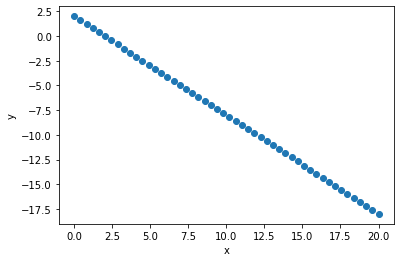

In [4]:
plt.plot(x,y,"o")
plt.xlabel("x")
plt.ylabel("y")

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

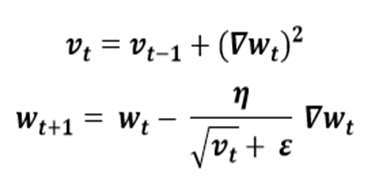

In [47]:
def Adagrad(X,Y,Max_Epochs,alpha=0.001,epsilon=0.001):
    # 1.  Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.
    theta_0=0
    theta_1=0
    v0=0
    v1=0
    loss=[]
    th0_list=[]
    th1_list=[]
    Y_predict_list=[]
   
    #Loop for max no of epochs
    for e in range(Max_Epochs):
        print("==============================================================")
        print("epoch ",e)
        
    
        #2. Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
       
        Y_predict=theta_0 + theta_1 *X
        Y_predict_list.append(Y_predict)
        #3. Calculate Cost function 𝑱(theta_0,theta_1 ).
        error=Y_predict - Y
        
        cost= (np.dot(error,error))/(2*len(X))
        loss.append(cost)

        print("Cost= " , cost)
        #4.  Calculate gradient of theta_0 and theta_1

        Grad_theta_0=(Y_predict - Y).sum()/(len(X))
        Grad_theta_1=(np.dot((Y_predict-Y),X) )/(len(X))

        #5. Update the parameters (simultaneously).
        v0 = v0 + ((Grad_theta_0)**2)
        v1 = v1 + ((Grad_theta_1)**2)
        
        theta_0 =theta_0 - (alpha/(np.sqrt(v0)+epsilon))*Grad_theta_0

        theta_1= theta_1 - (alpha/(np.sqrt(v1)+epsilon))*Grad_theta_1
        
        th0_list.append(theta_0)
        th1_list.append(theta_1)
        
        #stop condition 
        if(e!=0):
            if (abs(loss[e-1]-loss[e])<0.01):
                break
        

    
    return  th0_list, th1_list,loss,Y_predict,theta_0,theta_1 

In [48]:
th0_list, th1_list,loss,Y_predict,theta_0,theta_1 =Adagrad(x,y,1000,alpha=0.001,epsilon=0.0001)

epoch  0
Cost=  49.34693877551021
epoch  1
Cost=  49.224322944632966
epoch  2
Cost=  49.13776936611328
epoch  3
Cost=  49.06718366111701
epoch  4
Cost=  49.006114510457316
epoch  5
Cost=  48.951538885354054
epoch  6
Cost=  48.901756135509366
epoch  7
Cost=  48.85569815068775
epoch  8
Cost=  48.8126424525296
epoch  9
Cost=  48.7720734854682
epoch  10
Cost=  48.73360814385283
epoch  11
Cost=  48.69695255802811
epoch  12
Cost=  48.66187546708449
epoch  13
Cost=  48.6281910068706
epoch  14
Cost=  48.59574713989252
epoch  15
Cost=  48.56441761986811
epoch  16
Cost=  48.53409625484252
epoch  17
Cost=  48.504692713165326
epoch  18
Cost=  48.476129393727724
epoch  19
Cost=  48.448339047967345
epoch  20
Cost=  48.42126294410099
epoch  21
Cost=  48.3948494297465
epoch  22
Cost=  48.369052792118055
epoch  23
Cost=  48.343832343805516
epoch  24
Cost=  48.31915168186557
epoch  25
Cost=  48.2949780816889
epoch  26
Cost=  48.271281996841246
epoch  27
Cost=  48.24803664307851
epoch  28
Cost=  48.22521

In [49]:
r2_score(y,Y_predict)

-1.690373765655559

Text(0, 0.5, 'loss')

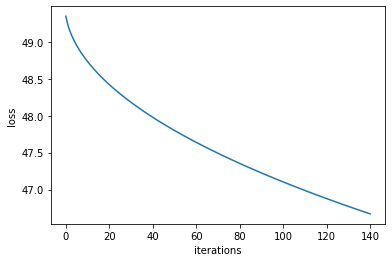

In [50]:
plt.plot(loss)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

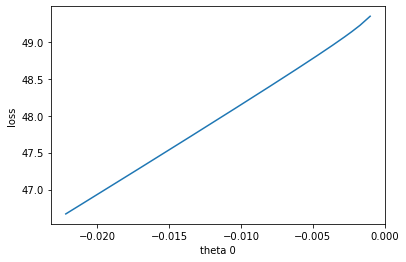

In [51]:
plt.plot(th0_list,loss)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

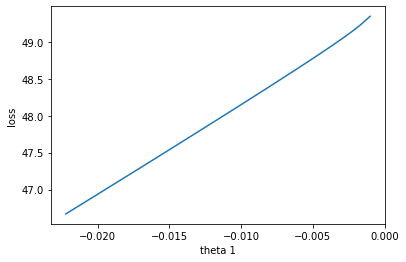

In [52]:
plt.plot(th1_list,loss)
plt.xlabel("theta 1")
plt.ylabel("loss")

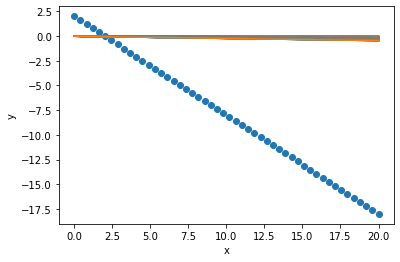

In [53]:
plt.plot(x,y,'o')
plt.ylabel("y")
plt.xlabel("x")

for i in range(len(th0_list)):
    plt.plot(x,th0_list[i]+th1_list[i]*x)
    
    
plt.show()

Text(0, 0.5, 'y')

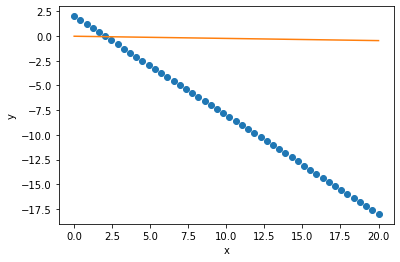

In [54]:
plt.plot(x,y,"o")
plt.plot(x,Y_predict)
plt.xlabel("x")
plt.ylabel("y")

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

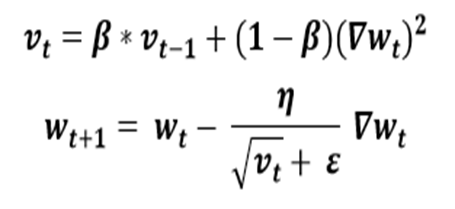

In [55]:
def RMSProp(X,Y,Max_Epochs,beta,alpha=0.001,epsilon=0.001):
    # 1.  Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.
    theta_0=0
    theta_1=0
    v0=0
    v1=0
    loss=[]
    th0_list=[]
    th1_list=[]
    Y_predict_list=[]
   
    #Loop for max no of epochs
    for e in range(Max_Epochs):
        print("==============================================================")
        print("epoch ",e)
        
    
        #2. Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
       
        Y_predict=theta_0 + theta_1 *X
        Y_predict_list.append(Y_predict)
        #3. Calculate Cost function 𝑱(theta_0,theta_1 ).
        error=Y_predict - Y
        
        cost= (np.dot(error,error))/(2*len(X))
        loss.append(cost)

        print("Cost= " , cost)
        #4.  Calculate gradient of theta_0 and theta_1

        Grad_theta_0=(Y_predict - Y).sum()/(len(X))
        Grad_theta_1=(np.dot((Y_predict-Y),X) )/(len(X))

        #5. Update the parameters (simultaneously).
        v0 = beta* v0 +(1-beta)*( (Grad_theta_0)**2)
        v1 = beta* v1 + (1-beta)*((Grad_theta_1)**2)
        
        theta_0 =theta_0 - (alpha/(np.sqrt(v0)+epsilon))*Grad_theta_0

        theta_1= theta_1 - (alpha/(np.sqrt(v1)+epsilon))*Grad_theta_1
        
        th0_list.append(theta_0)
        th1_list.append(theta_1)
        
        #stop condition 
        if(e!=0):
            if (abs(loss[e-1]-loss[e])<0.01):
                break
        

    
    return  th0_list, th1_list,loss,Y_predict,theta_0,theta_1 

In [56]:
th0_list_RMS, th1_list_RMS,loss_RMS,Y_predict_RMS,theta_0_RMS,theta_1_RMS=RMSProp(x,y,1000,0.6,alpha=0.001,epsilon=0.001)

epoch  0
Cost=  49.34693877551021
epoch  1
Cost=  49.153142327898514
epoch  2
Cost=  49.000322633105334
epoch  3
Cost=  48.86251185693245
epoch  4
Cost=  48.73193549856203
epoch  5
Cost=  48.60527418723521
epoch  6
Cost=  48.48087470951422
epoch  7
Cost=  48.357845400710765
epoch  8
Cost=  48.235683578796646
epoch  9
Cost=  48.11409854766096
epoch  10
Cost=  47.992919674668364
epoch  11
Cost=  47.87204591365369
epoch  12
Cost=  47.7514171109799
epoch  13
Cost=  47.63099734388362
epoch  14
Cost=  47.51076511939601
epoch  15
Cost=  47.39070756345855
epoch  16
Cost=  47.27081695935857
epoch  17
Cost=  47.15108867975182
epoch  18
Cost=  47.031519949099
epoch  19
Cost=  46.91210910228841
epoch  20
Cost=  46.79285514022766
epoch  21
Cost=  46.67375746334993
epoch  22
Cost=  46.55481571177219
epoch  23
Cost=  46.43602966940986
epoch  24
Cost=  46.31739920645289
epoch  25
Cost=  46.19892424485393
epoch  26
Cost=  46.08060473762218
epoch  27
Cost=  45.96244065640022
epoch  28
Cost=  45.84443198

epoch  128
Cost=  34.828180923668796
epoch  129
Cost=  34.72586373104878
epoch  130
Cost=  34.623701874049836
epoch  131
Cost=  34.52169535212702
epoch  132
Cost=  34.41984416473377
epoch  133
Cost=  34.31814831132185
epoch  134
Cost=  34.216607791341325
epoch  135
Cost=  34.115222604240614
epoch  136
Cost=  34.013992749466425
epoch  137
Cost=  33.91291822646375
epoch  138
Cost=  33.81199903467592
epoch  139
Cost=  33.71123517354451
epoch  140
Cost=  33.610626642509395
epoch  141
Cost=  33.51017344100872
epoch  142
Cost=  33.40987556847886
epoch  143
Cost=  33.30973302435451
epoch  144
Cost=  33.209745808068554
epoch  145
Cost=  33.109913919052126
epoch  146
Cost=  33.01023735673461
epoch  147
Cost=  32.91071612054358
epoch  148
Cost=  32.811350209904866
epoch  149
Cost=  32.71213962424244
epoch  150
Cost=  32.61308436297854
epoch  151
Cost=  32.514184425533536
epoch  152
Cost=  32.41543981132602
epoch  153
Cost=  32.31685051977271
epoch  154
Cost=  32.21841655028852
epoch  155
Cost=  

epoch  319
Cost=  18.10343099188069
epoch  320
Cost=  18.030770587330935
epoch  321
Cost=  17.95826537202906
epoch  322
Cost=  17.885915344893263
epoch  323
Cost=  17.81372050483711
epoch  324
Cost=  17.74168085076947
epoch  325
Cost=  17.6697963815945
epoch  326
Cost=  17.59806709621163
epoch  327
Cost=  17.526492993515507
epoch  328
Cost=  17.455074072395984
epoch  329
Cost=  17.38381033173807
epoch  330
Cost=  17.312701770421917
epoch  331
Cost=  17.241748387322772
epoch  332
Cost=  17.170950181310957
epoch  333
Cost=  17.100307151251833
epoch  334
Cost=  17.02981929600576
epoch  335
Cost=  16.959486614428073
epoch  336
Cost=  16.889309105369044
epoch  337
Cost=  16.81928676767385
epoch  338
Cost=  16.749419600182538
epoch  339
Cost=  16.679707601729994
epoch  340
Cost=  16.610150771145896
epoch  341
Cost=  16.540749107254705
epoch  342
Cost=  16.4715026088756
epoch  343
Cost=  16.402411274822455
epoch  344
Cost=  16.33347510390382
epoch  345
Cost=  16.26469409492285
epoch  346
Cost

epoch  436
Cost=  10.654955990932299
epoch  437
Cost=  10.600443899980721
epoch  438
Cost=  10.546086829771674
epoch  439
Cost=  10.491884778377825
epoch  440
Cost=  10.437837743860758
epoch  441
Cost=  10.38394572427086
epoch  442
Cost=  10.33020871764725
epoch  443
Cost=  10.27662672201766
epoch  444
Cost=  10.22319973539834
epoch  445
Cost=  10.16992775579396
epoch  446
Cost=  10.116810781197508
epoch  447
Cost=  10.063848809590178
epoch  448
Cost=  10.011041838941283
epoch  449
Cost=  9.958389867208124
epoch  450
Cost=  9.905892892335913
epoch  451
Cost=  9.853550912257646
epoch  452
Cost=  9.80136392489399
epoch  453
Cost=  9.74933192815318
epoch  454
Cost=  9.697454919930912
epoch  455
Cost=  9.645732898110218
epoch  456
Cost=  9.594165860561354
epoch  457
Cost=  9.542753805141695
epoch  458
Cost=  9.491496729695598
epoch  459
Cost=  9.440394632054291
epoch  460
Cost=  9.389447510035765
epoch  461
Cost=  9.338655361444635
epoch  462
Cost=  9.288018184072007
epoch  463
Cost=  9.23

Cost=  5.700832296135766
epoch  544
Cost=  5.662893637150473
epoch  545
Cost=  5.625109702369213
epoch  546
Cost=  5.587480487775402
epoch  547
Cost=  5.550005989318794
epoch  548
Cost=  5.512686202915045
epoch  549
Cost=  5.475521124445278
epoch  550
Cost=  5.438510749755636
epoch  551
Cost=  5.401655074656821
epoch  552
Cost=  5.364954094923658
epoch  553
Cost=  5.328407806294592
epoch  554
Cost=  5.292016204471241
epoch  555
Cost=  5.255779285117887
epoch  556
Cost=  5.219697043861001
epoch  557
Cost=  5.183769476288726
epoch  558
Cost=  5.1479965779503605
epoch  559
Cost=  5.112378344355858
epoch  560
Cost=  5.076914770975271
epoch  561
Cost=  5.041605853238221
epoch  562
Cost=  5.006451586533359
epoch  563
Cost=  4.971451966207769
epoch  564
Cost=  4.936606987566434
epoch  565
Cost=  4.901916645871632
epoch  566
Cost=  4.867380936342344
epoch  567
Cost=  4.832999854153656
epoch  568
Cost=  4.798773394436141
epoch  569
Cost=  4.764701552275214
epoch  570
Cost=  4.730784322710508
ep

epoch  646
Cost=  2.6050041917092135
epoch  647
Cost=  2.5829721294801584
epoch  648
Cost=  2.5610940651988505
epoch  649
Cost=  2.5393699862058723
epoch  650
Cost=  2.5177998796405547
epoch  651
Cost=  2.4963837324357336
epoch  652
Cost=  2.4751215313123236
epoch  653
Cost=  2.454013262773654
epoch  654
Cost=  2.433058913099602
epoch  655
Cost=  2.412258468340487
epoch  656
Cost=  2.3916119143107033
epoch  657
Cost=  2.3711192365821114
epoch  658
Cost=  2.3507804204771277
epoch  659
Cost=  2.330595451061533
epoch  660
Cost=  2.3105643131369793
epoch  661
Cost=  2.2906869912331342
epoch  662
Cost=  2.2709634695995105
epoch  663
Cost=  2.2513937321968998
epoch  664
Cost=  2.231977762688411
epoch  665
Cost=  2.2127155444301074
epoch  666
Cost=  2.19360706046115
epoch  667
Cost=  2.1746522934935193
epoch  668
Cost=  2.15585122590116
epoch  669
Cost=  2.137203839708623
epoch  670
Cost=  2.1187101165790985
epoch  671
Cost=  2.100370037801814
epoch  672
Cost=  2.0821835842787597
epoch  673
C

In [58]:
r2_score(y,Y_predict_RMS)

0.9234791749837952

Text(0, 0.5, 'loss')

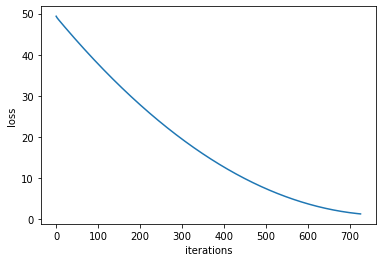

In [60]:
plt.plot(loss_RMS)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

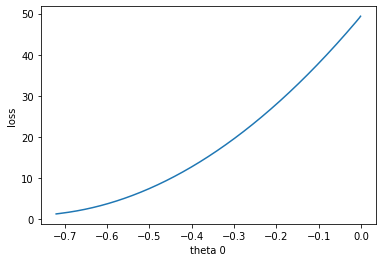

In [61]:
plt.plot(th0_list_RMS,loss_RMS)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

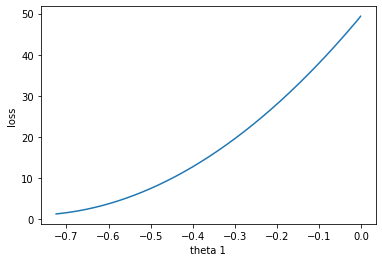

In [63]:
plt.plot(th1_list_RMS,loss_RMS)
plt.xlabel("theta 1")
plt.ylabel("loss")

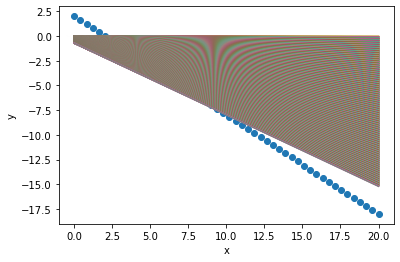

In [64]:
plt.plot(x,y,'o')
plt.ylabel("y")
plt.xlabel("x")

for i in range(len(th0_list_RMS)):
    plt.plot(x,th0_list_RMS[i]+th1_list_RMS[i]*x)
    
    
plt.show()

Text(0, 0.5, 'y')

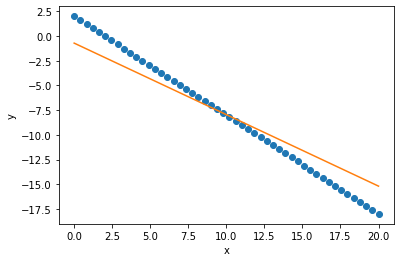

In [65]:
plt.plot(x,y,"o")
plt.plot(x,Y_predict_RMS)
plt.xlabel("x")
plt.ylabel("y")

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

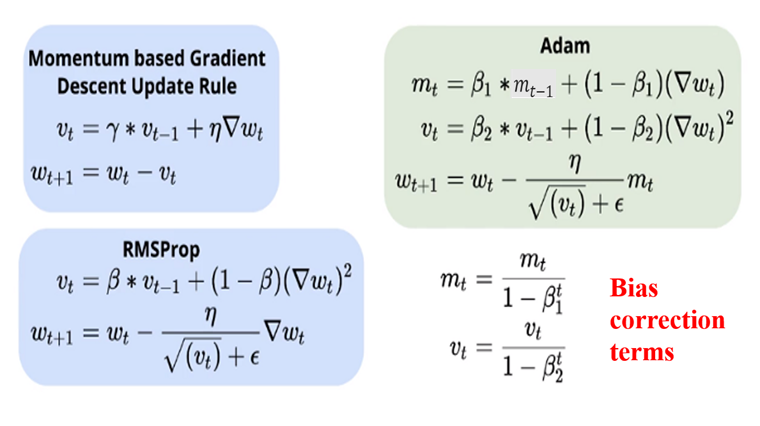

In [128]:
def ADAM(X,Y,Max_Epochs,beta_1,beta_2,alpha=0.001,epsilon=0.001):
    # 1.  Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.
    theta_0=0
    theta_1=0
    v0=0
    v1=0
    m0=0
    m1=0
    v0_hat=0
    v1_hat=0
    m0_hat=0
    m1_hat=0
    loss=[]
    th0_list=[]
    th1_list=[]
    Y_predict_list=[]
   
    #Loop for max no of epochs
    for e in range(Max_Epochs):
        print("==============================================================")
        print("epoch ",e)
        
    
        #2. Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
       
        Y_predict=theta_0 + theta_1 *X
        Y_predict_list.append(Y_predict)
        #3. Calculate Cost function 𝑱(theta_0,theta_1 ).
        error=Y_predict - Y
        
        cost= (np.dot(error,error))/(2*len(X))
        loss.append(cost)

        print("Cost= " , cost)
        #4.  Calculate gradient of theta_0 and theta_1

        Grad_theta_0=(Y_predict - Y).sum()/(len(X))
        Grad_theta_1=(np.dot((Y_predict-Y),X) )/(len(X))

        #5. Update the parameters (simultaneously).
        
        m0=beta_1 * m0 +(1-beta_1)*Grad_theta_0
        m1=beta_1 * m1 + (1-beta_1)*Grad_theta_1
        
        v0 = beta_2* v0 +(1-beta_2)*( (Grad_theta_0)**2)
        v1 = beta_2* v1 + (1-beta_2)*((Grad_theta_1)**2)
        
        m0_hat=m0/(1 - (beta_1**e))
        m1_hat=m1/(1 - (beta_1**e))
        
        v0_hat=v0/(1 - (beta_2**e))
        v1_hat=v1/(1-(beta_2**e))
        
        theta_0 =theta_0 - (alpha*m0/(np.sqrt(v0_hat)+epsilon))

        theta_1= theta_1 - (alpha*m1/(np.sqrt(v1)+epsilon))
        
        th0_list.append(theta_0)
        th1_list.append(theta_1)
        
        #stop condition 
        if(e!=0):
            if (abs(loss[e-1]-loss[e])<0.001):
                break
        

    
    return  th0_list, th1_list,loss,Y_predict,theta_0,theta_1 

In [129]:
th0_list_adam, th1_list_adam,loss_adam,Y_predict_adam,theta_0_abam,theta_1_adam =ADAM(x,y,100,0.6,0.6,alpha=0.0001,epsilon=0.00001)

epoch  0
Cost=  49.34693877551021
epoch  1
Cost=  49.33968516816314
epoch  2
Cost=  49.33010607410517
epoch  3
Cost=  49.319386418255064
epoch  4
Cost=  49.30802906562274
epoch  5
Cost=  49.2963032984054
epoch  6
Cost=  49.284361521348934
epoch  7
Cost=  49.27229226757487
epoch  8
Cost=  49.26014767888326
epoch  9
Cost=  49.247958700874925
epoch  10
Cost=  49.2357437806706
epoch  11
Cost=  49.22351394330494
epoch  12
Cost=  49.21127578802583
epoch  13
Cost=  49.19903326852931
epoch  14
Cost=  49.18678875481044
epoch  15
Cost=  49.17454366799454
epoch  16
Cost=  49.162298860399495
epoch  17
Cost=  49.15005484326112
epoch  18
Cost=  49.1378119232494
epoch  19
Cost=  49.12557028433112
epoch  20
Cost=  49.113330036867964
epoch  21
Cost=  49.101091247066954
epoch  22
Cost=  49.0888539546466
epoch  23
Cost=  49.07661818343478
epoch  24
Cost=  49.06438394772629
epoch  25
Cost=  49.05215125609687
epoch  26
Cost=  49.03992011369132
epoch  27
Cost=  49.02769052359609
epoch  28
Cost=  49.01546248

C:\Users\esraa\AppData\Local\Temp/ipykernel_5388/1396654495.py:48: RuntimeWarning: divide by zero encountered in double_scalars
  m0_hat=m0/(1 - (beta_1**e))
C:\Users\esraa\AppData\Local\Temp/ipykernel_5388/1396654495.py:49: RuntimeWarning: divide by zero encountered in double_scalars
  m1_hat=m1/(1 - (beta_1**e))
C:\Users\esraa\AppData\Local\Temp/ipykernel_5388/1396654495.py:51: RuntimeWarning: divide by zero encountered in double_scalars
  v0_hat=v0/(1 - (beta_2**e))
C:\Users\esraa\AppData\Local\Temp/ipykernel_5388/1396654495.py:52: RuntimeWarning: divide by zero encountered in double_scalars
  v1_hat=v1/(1-(beta_2**e))


In [123]:
r2_score(y,Y_predict_adam)

-1.8447058823529408

## Congratulations 
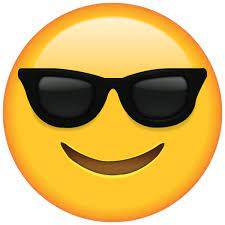